In [14]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

#plt.subplot?

<IPython.core.display.Javascript object>


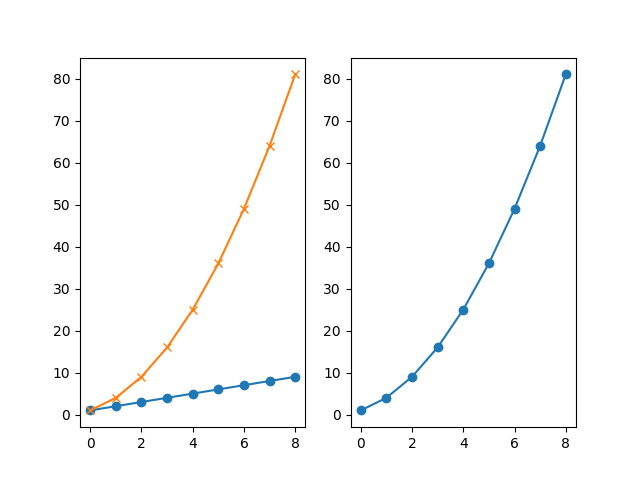

In [15]:
plt.figure()

linear_data = np.array([1,2,3,4,5,6,7,8,9])
exponential_data = np.array([1,2,3,4,5,6,7,8,9])**2

plt.subplot(1,2,1)
plt.plot(linear_data, '-o')

plt.subplot(1,2,1)
plt.plot(exponential_data, '-x')


plt.subplot(1,2,2)
plt.plot(exponential_data, '-o')


plt.show()

<IPython.core.display.Javascript object>


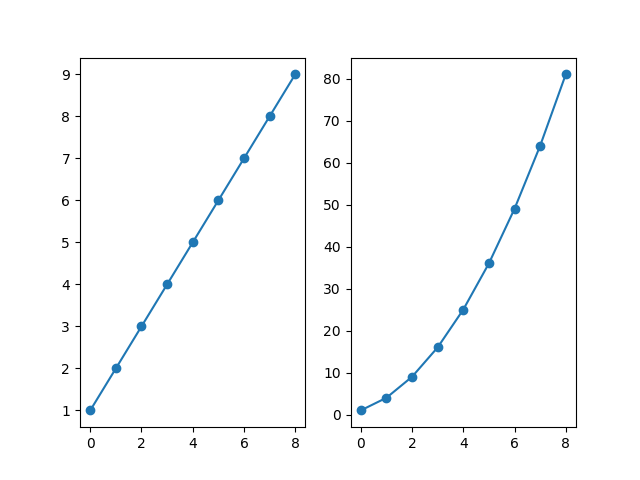

In [16]:
#Notice that axes are not shared from graph to graph
plt.figure()

linear_data = np.array([1,2,3,4,5,6,7,8,9])
exponential_data = np.array([1,2,3,4,5,6,7,8,9])**2

plt.subplot(1,2,1)
plt.plot(linear_data, '-o')

plt.subplot(1,2,2)
plt.plot(exponential_data, '-o')


plt.show()

<IPython.core.display.Javascript object>


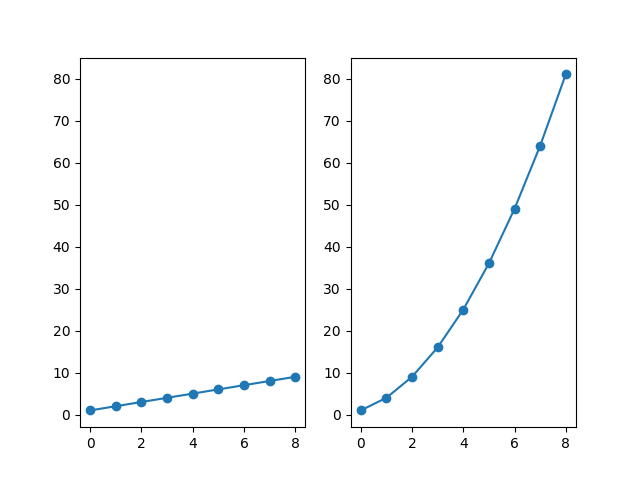

In [17]:
#This problem is solved by asigning a variable to subplot(121), which we called ax1, and called it as sharey within
#the second variable ax2.

plt.figure()

linear_data = np.array([1,2,3,4,5,6,7,8,9])
exponential_data = np.array([1,2,3,4,5,6,7,8,9])**2

ax1 = plt.subplot(1,2,1)
plt.plot(linear_data, '-o')

ax2 = plt.subplot(1,2,2, sharey = ax1)
plt.plot(exponential_data, '-o')


plt.show()

<IPython.core.display.Javascript object>


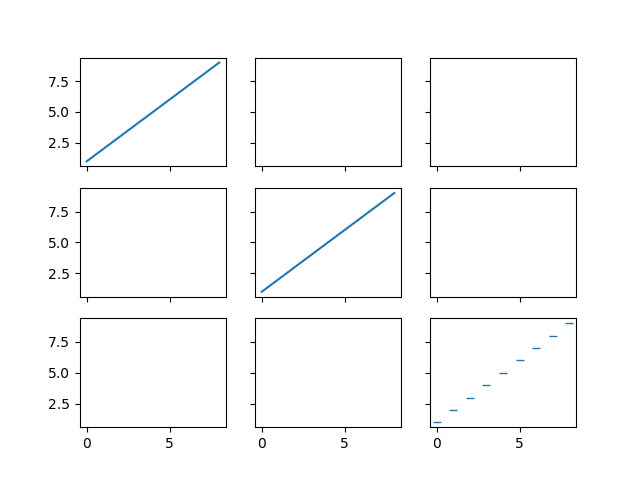

In [18]:
# to create a grid of graphs you should follow the rational of this example
# to understand why go to this link: 
#https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python
#do not forget that is plt.subplots with S and not plt.subplot

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, sharey = True, sharex = True)

ax1.plot(linear_data, '-')
ax5.plot(linear_data, '-')
ax9.plot(linear_data, '_')


<IPython.core.display.Javascript object>


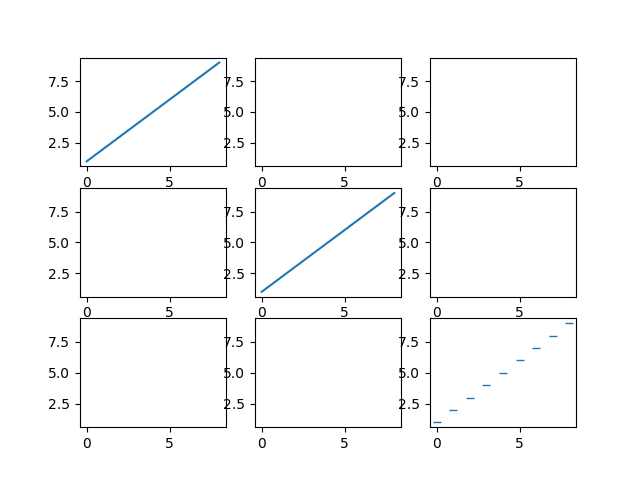

In [19]:
#Notice that both Y and X labels were NOT shared across the graphs in the example above.
#by iterating the axis you could solve this problem

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, sharey = True, sharex = True)

ax1.plot(linear_data, '-')
ax5.plot(linear_data, '-')
ax9.plot(linear_data, '_')

for ax in plt.gcf().get_axes(): #plt.gcf().get_axes() is like saying len(9)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

# Histograms

<IPython.core.display.Javascript object>


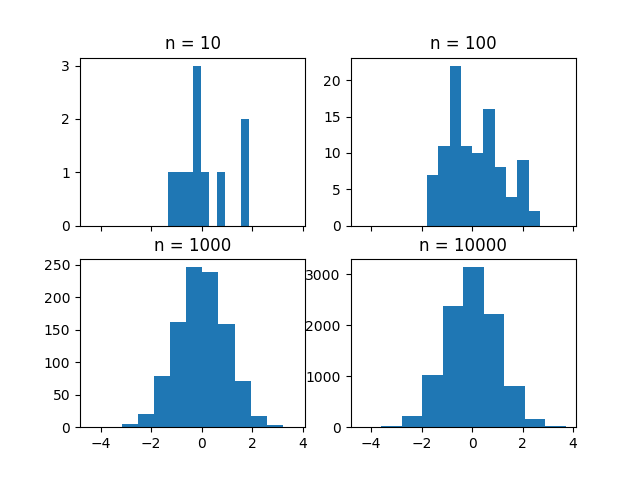

In [20]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = True)

axs = [ax1, ax2, ax3, ax4]

for i in range(0, len(axs)):
    sample_size = (10**(1 + i))
    sample = np.random.normal(loc = 0, scale = 1.0, size = sample_size )
    axs[i].hist(sample)
    axs[i].set_title('n = {}'.format(sample_size))





<IPython.core.display.Javascript object>


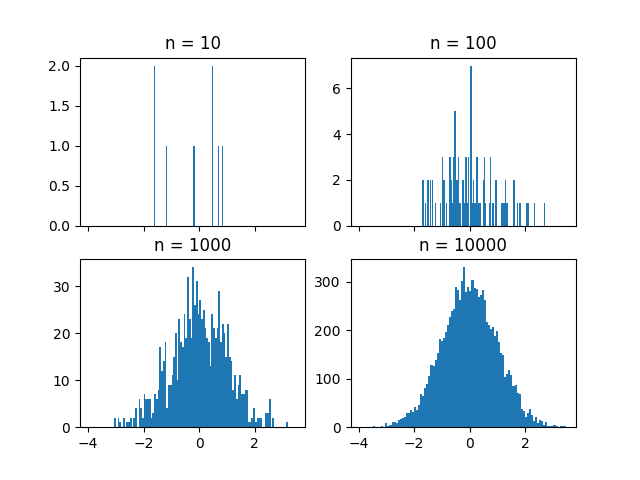

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = True)

axs = [ax1, ax2, ax3, ax4]

for i in range(0, len(axs)):
    sample_size = (10**(1 + i))
    sample = np.random.normal(loc = 0, scale = 1.0, size = sample_size )
    axs[i].hist(sample, bins = 100)
    axs[i].set_title('n = {}'.format(sample_size))


<IPython.core.display.Javascript object>


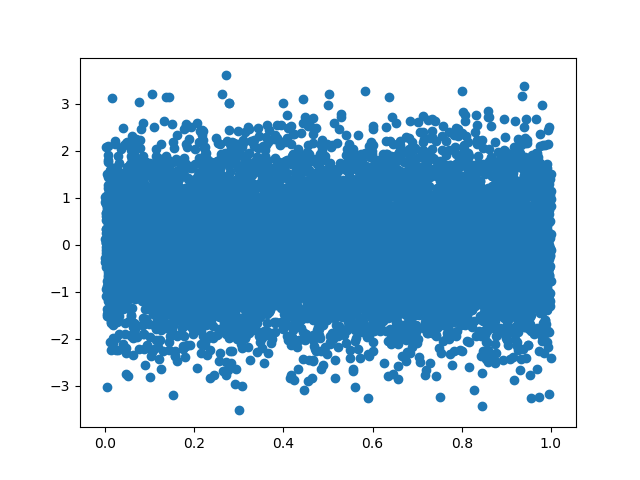

In [22]:
plt.figure()

Y = np.random.normal( loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)

plt.scatter(X, Y)

#plt.show

<IPython.core.display.Javascript object>


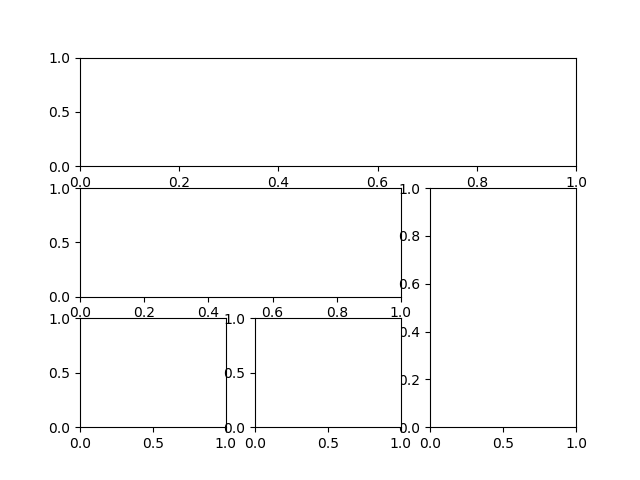

In [23]:
import matplotlib.gridspec as gridspec


plt.figure()

ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))





Some interesting documentation for this might be found here:

https://matplotlib.org/users/gridspec.html

<IPython.core.display.Javascript object>


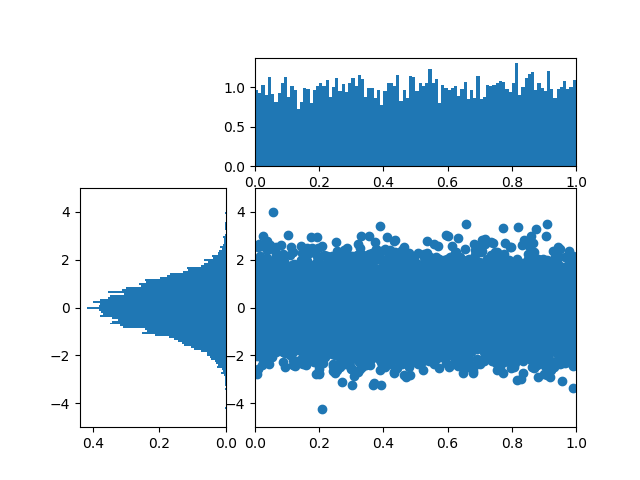

In [41]:
#Let's create a full graph using gridspec

#Create the figure
plt.figure()

#Define the disposition of your grid
gs = gridspec.GridSpec(3,3)
top = plt.subplot(gs[0, 1:])
side = plt.subplot(gs[1:, 0])
down = plt.subplot(gs[1:, 1:])

#Set the variables to be used within the graph grid
Y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)

#Create graph
top.clear()
top.hist(X, bins = 100, normed = True)
side.clear()
side.hist(Y, bins = 100, orientation = 'horizontal', normed = True)
side.invert_xaxis() #the orientation of the normal distribution must change to make sense
down.clear()
down.scatter(X,Y)

#Adjust axis
for ax in [top, down]:
    ax.set_xlim(0, 1)
for ax in [side, down]:
    ax.set_ylim(-5, 5)





# Box and Whisker Plots

In [51]:
#Let's create our data frame with a normal, random and gamma distribution
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
import pandas as pd

normal_dist = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
random_dist = np.random.random(size = 10000)
gamma_dist = np.random.gamma(2, size = 10000)

df = pd.DataFrame({'normal': normal_dist, 'random': random_dist, 'gamma': gamma_dist})
df.head()

,gamma,normal,random
0,2.300138,0.161716,0.354325
1,5.826701,0.068765,0.612096
2,2.501789,-0.746443,0.372971
3,3.520355,-1.457125,0.930942
4,1.465946,0.867520,0.769313


In [52]:
df.describe()

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,1.996500,-0.007280,0.498919
std,1.421215,0.999684,0.288630
min,0.007582,-4.194566,0.000033
25%,0.956585,-0.696374,0.248314
50%,1.661683,0.000494,0.502565
75%,2.697265,0.668050,0.749380
max,13.922891,3.713374,0.999871


<IPython.core.display.Javascript object>


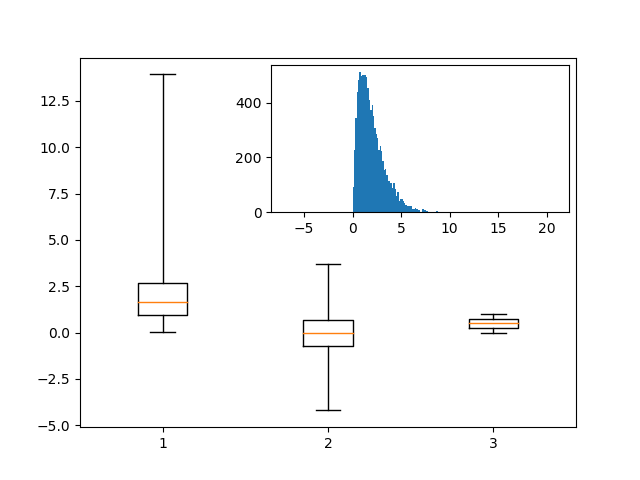

In [59]:
plt.figure()

graph_wb = plt.boxplot([df['gamma'], df['normal'], df['random']], whis = 'range')

# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=1)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.6)
ax2.yaxis.tick_left()